# 簡介

在這份文件中，我們說明微軟認知服務的 Face detection API 的使用方式。

Face detection API 會將圖片送到微軟的雲端機器，並使用雲端機器來辦識圖片中的人臉。  
此外，亦會回傳人臉的相關資料，諸如人臉的位置，表情，性別，年齡…等。

## 學習資源

- [REST API](https://docs.microsoft.com/zh-tw/azure/cognitive-services/face/quickstarts/python)  
- [認知服務 API 說明](https://azure.microsoft.com/zh-tw/services/cognitive-services/#features)  
- [Microsoft Learn](https://docs.microsoft.com/zh-tw/learn/browse/?products=azure-cognitive-services)  
- [JSON parser](http://json.parser.online.fr/)


In [1]:
import requests
import json

- subscription_key: 是微軟服務的金鑰
- face_api_url: 則是 Azure 上服務的網址 

在 [Azure Portal](https://portal.azure.com/) 上點選 Face API 的服務 (如下圖)

![](FaceAPI1.png)

點選「金鑰與端點」。

![](FaceAPI2.png)

下圖中分別是金鑰與端點的資料，請妥善保存。 
透過金鑰可以存取你的服務，而這服務是收費的，因此若金鑰流出，會影響到你的帳戶中的費用。  
點選「箭號」的部分，可以將金鑰以及端點複製到剪貼簿中。

![](FaceAPI3.png)

In [3]:
#將上面的金鑰貼入單引號中
subscription_key = ''
face_api_url = 'https://<url>/face/v1.0/detect'

## 設定呼叫服務的參數

headers 是要傳給服務位址的金鑰

params 則是呼叫服務時，所傳出去的參數。  
在底下的例子中，我們請微軟分析照片中的資料，回傳臉部的 id (returnFaceId)。  
不要回傳 FaceLandmarks。  
要回傳一些臉部的屬性 (FaceAttribute)，這些屬性例如年齡 (age), 性別 (gender)，有沒有眼鏡 (glasses)…等。

FaceLandmarks 是人臉部容易偵測的目標點，例如瞳孔，鼻尖…等。細節請參考微軟的[文件](https://docs.microsoft.com/zh-tw/azure/cognitive-services/face/concepts/face-detection#face-landmarks)。

FaceAttribute 也是可以參考這份[文件](https://docs.microsoft.com/zh-tw/azure/cognitive-services/face/concepts/face-detection#face-landmarks)的說明。



In [4]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise',
}

## 指定影像的 url

image_url 指定了照片的所在位置。

In [5]:
image_url = 'https://www.shop1688.com.tw/aom20190329050/images/2.jpg'

## 將照片傳給微軟的服務

我們使用 Python 的 requests 套件，將前述的參數，以及圖片的 url 傳給微軟的服務。  
requests 套件會負責連結網路，並將資料以 Http 協定的方式傳出去。

requests 將參數以及圖片傳出去後，會等待微軟服務的回應。  
接著把回應放在 response 變數中。  

我們可以將微軟回傳的資料轉成 JSON 格式，並印出來。

JSON (JavaScript Object Notation) 是網路上十分通用的資料傳遞格式。  
它是純文字的格式，人類可讀，而且容易用程式解析，可以說是網頁應用中很廣泛使用的「資料交換」格式。  
關於 JSON 的說明，請參考[這裏](https://zh.wikipedia.org/wiki/JSON)。

In [6]:
response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})
print(json.dumps(response.json()))

[{"faceId": "66e61e37-9cbe-497a-a299-b2c616c251c2", "faceRectangle": {"top": 174, "left": 809, "width": 193, "height": 193}, "faceAttributes": {"smile": 0.991, "headPose": {"pitch": -6.3, "roll": -4.3, "yaw": -11.1}, "gender": "female", "age": 26.0, "facialHair": {"moustache": 0.0, "beard": 0.0, "sideburns": 0.0}, "glasses": "NoGlasses", "emotion": {"anger": 0.0, "contempt": 0.0, "disgust": 0.0, "fear": 0.0, "happiness": 0.991, "neutral": 0.002, "sadness": 0.007, "surprise": 0.0}, "blur": {"blurLevel": "low", "value": 0.0}, "exposure": {"exposureLevel": "overExposure", "value": 0.76}, "noise": {"noiseLevel": "low", "value": 0.05}, "makeup": {"eyeMakeup": true, "lipMakeup": true}, "accessories": [], "occlusion": {"foreheadOccluded": false, "eyeOccluded": false, "mouthOccluded": false}, "hair": {"bald": 0.03, "invisible": false, "hairColor": [{"color": "black", "confidence": 1.0}, {"color": "brown", "confidence": 0.88}, {"color": "other", "confidence": 0.37}, {"color": "gray", "confidenc

上面印出的 JSON 其實很難讀懂。  
因此我們使用[JSON Parser](http://json.parser.online.fr/)這個服務來解析回傳的JSON內容。

在網頁的左方把回傳的文字貼上，然後右方就會出現解析的結果。  
結果以樹狀的方式呈現，一目瞭然 (見下圖)。

![](FaceAPI4.png)

## 撰寫程式，解析 JSON 結果

底下我們使用程式碼，將 response 回傳的資料解析出來。

FaceAPI 服務回傳的結果通常會被包在兩種元素中。
- vector: 資料被包在中括號中 ([])
- 字典:資料被包含大括號中 ({})

若資料被包在 vector 中，那我們使用下標 (或稱索引值) 就可以存取這個資料了。

例如 ``faceData[0]`` 代表存取回傳臉部資料中的第 1 張臉的資料 (索引值 0 代表第 1 張臉，索引值 1 代表第 2 張臉，依此類推)。

若資料被包在字典中，那就以 key 的方式存取之。  
例如前述的 ``faceId`` 是被包含在大括號中，表示它是被包在字典中。  
它的呈現方式是 ``"faceId":"e2687ad4-7248-4af3-96df-65a299e223c8"``，  
其中 ``faceId`` 是 key ，而 ``e2687ad4-7248-4af3-96df-65a299e223c8`` 則是 faceId 對應的值。

所以，
```python=
faceData[0]['faceId']
```
代表了第 1 張臉的 faceId 資料。

In [7]:
faceData = response.json()
print(faceData[0]['faceId'])

66e61e37-9cbe-497a-a299-b2c616c251c2


In [8]:
print(faceData[0]['faceRectangle']['top'])

174


## 在照片上框出人臉的位置

底下的程式碼中，我們示範如何框出照片中的人臉。

FaceAPI 的服務中已經回傳臉部的位置了。分別是：  
- (left, top): 左上角座標
- width: 臉寬
- height: 臉高

要組成一個矩形，我們需要矩形的「左上」，以及「右下」兩個座標點。  
底下的程式碼會完成這件事。

In [17]:
from io import BytesIO
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
x0 = faceData[0]['faceRectangle']['left']
y0 = faceData[0]['faceRectangle']['top']
w = faceData[0]['faceRectangle']['width']
h = faceData[0]['faceRectangle']['height']
x1 = w + x0
y1 = h + y0

在上面的程式碼中，$(x_0, y_0)$ 是矩形的左上角。  
$(x_1, y_1)$ 則是矩形的右下角

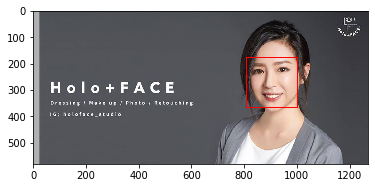

In [10]:
response = requests.get(image_url)
# response.content 中儲有影像的資料
img = Image.open(BytesIO(response.content))
draw = ImageDraw.Draw(img)
#這行在臉部的地方畫出矩形，顏色是紅色，線條寬度是 3
draw.rectangle([(x0,y0),(x1,y1)], outline='red', width=3)

# show the image
imshow(img)

## 處理多張人臉的圖片

底下的範例中，我們載入多張人臉的照片，示範如何讀取照片中每張人臉的資料。

In [11]:
image_url = 'https://doqvf81n9htmm.cloudfront.net/data/crop_article/36614/%E4%BA%94%E6%9C%88%E5%A4%A9%E9%A6%96%E5%9C%962.jpg_1140x855.jpg'

In [12]:
response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})
print(json.dumps(response.json()))

[{"faceId": "f0569b7d-38d1-4d8e-8563-8f3115f791a2", "faceRectangle": {"top": 116, "left": 458, "width": 69, "height": 69}, "faceAttributes": {"smile": 0.01, "headPose": {"pitch": -6.1, "roll": 9.7, "yaw": -12.9}, "gender": "male", "age": 37.0, "facialHair": {"moustache": 0.1, "beard": 0.1, "sideburns": 0.1}, "glasses": "ReadingGlasses", "emotion": {"anger": 0.0, "contempt": 0.001, "disgust": 0.0, "fear": 0.0, "happiness": 0.01, "neutral": 0.989, "sadness": 0.0, "surprise": 0.0}, "blur": {"blurLevel": "low", "value": 0.14}, "exposure": {"exposureLevel": "overExposure", "value": 0.77}, "noise": {"noiseLevel": "low", "value": 0.06}, "makeup": {"eyeMakeup": false, "lipMakeup": false}, "accessories": [{"type": "glasses", "confidence": 0.98}], "occlusion": {"foreheadOccluded": false, "eyeOccluded": false, "mouthOccluded": false}, "hair": {"bald": 0.05, "invisible": false, "hairColor": [{"color": "black", "confidence": 1.0}, {"color": "brown", "confidence": 0.96}, {"color": "gray", "confidenc

## 取得照片中有幾張人臉

faceData 本身就是一個 vector。  
一個 vector 可以使用 len() 函式來取得它包含了幾個元素。

In [13]:
faceData = response.json()
print(f'共有 {len(faceData)} 人在這張照片中')

共有 5 人在這張照片中


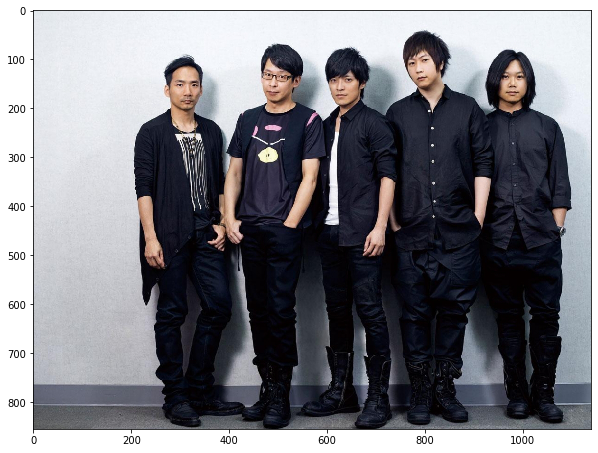

In [19]:
response = requests.get(image_url)
plt.figure(figsize=(10,10))
img = Image.open(BytesIO(response.content))
imshow(img)

In [0]:
for face in faceData:
  print(face['faceAttributes']['gender'])


male
male
female
male
male


## 框出照片中的每張人臉

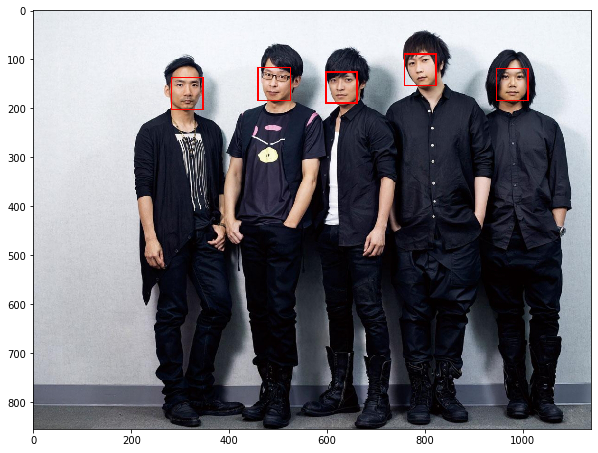

In [21]:
#掃描每張人臉
plt.figure(figsize=(10,10))
draw = ImageDraw.Draw(img)
for face in faceData:
    x0 = face['faceRectangle']['left']
    y0 = face['faceRectangle']['top']
    w = face['faceRectangle']['width']
    h = face['faceRectangle']['height']
    x1 = w + x0
    y1 = h + y0
    draw.rectangle([(x0,y0),(x1,y1)], outline='red', width=3)
imshow(img)


## 框出人臉，並放上文字

底下的例子會掃描照片中的每張人臉，並且在人臉附近標上文字。

程式碼和前面的片段很像，除了加上文字的部分。

```python=
ImageFont.truetype("arial.ttf", 50)
```
會載入 arial 字型，並且把字體大小設成 50。  
上述程式碼是在 windows 環境下執行。

如果要在 colab 上執行，那要使用 Linux 的方式指定字型 (因為 colab 背後是 Linux 的作業系統)。  
程式碼請改為 

```python=
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf", 40)
```

怎麼知道要選什麼字型呢？
點選左方的「檔案匣」圖示 (如下圖)，接著再點「往上一層」。

![](FaceAPI5.png)

接著找 user -> share -> fonts -> truetype -> liberation 資料匣 (如下圖)，  
都點開後，就可以看到字型了。

![](FaceAPI6.png)

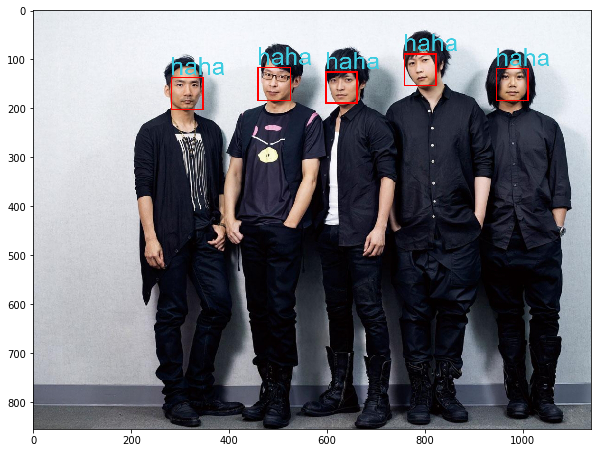

In [32]:
#掃描每張人臉
response = requests.get(image_url)
plt.figure(figsize=(10,10))
img = Image.open(BytesIO(response.content))
#對每張人臉畫圖
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("arial.ttf", 50)
#在 colab 上，請用底下語法載入字型 (colab 是 Linux 環境，可以由左方的 Files 中找到字型的路徑)
#font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf", 40)
for face in faceData:
    x0 = face['faceRectangle']['left']
    y0 = face['faceRectangle']['top']
    w = face['faceRectangle']['width']
    h = face['faceRectangle']['height']
    x1 = w + x0
    y1 = h + y0
    draw.rectangle([(x0,y0),(x1,y1)], outline='red', width=3)
    draw.text((x0,y0-50), 'haha', fill=(62,204,224), font=font)
imshow(img)

## 由本地端載入資料

前面我們都是丟一個 url 給 Face API.  
在底下的範例中我們讀取本地端的一張照片，將這張照片傳到給微軟的 FaceAPI.  

作法是
1. 讀取硬碟中的圖片
2. 設定 header。這兒的 header 和前面的差不多，只差在要加上 'Content-Type': 'application/octet-stream'。'application/octet-stream' 代表我們要用本地的檔案上傳。
3. 在 post 的部分把圖片附上。

[{"faceId": "daea5c75-72f4-4289-aca0-f4654e090a99", "faceRectangle": {"top": 248, "left": 626, "width": 534, "height": 534}, "faceAttributes": {"smile": 0.0, "headPose": {"pitch": -3.7, "roll": 3.9, "yaw": -31.0}, "gender": "female", "age": 20.0, "facialHair": {"moustache": 0.0, "beard": 0.0, "sideburns": 0.0}, "glasses": "NoGlasses", "emotion": {"anger": 0.0, "contempt": 0.0, "disgust": 0.0, "fear": 0.0, "happiness": 0.0, "neutral": 0.986, "sadness": 0.014, "surprise": 0.0}, "blur": {"blurLevel": "medium", "value": 0.28}, "exposure": {"exposureLevel": "goodExposure", "value": 0.54}, "noise": {"noiseLevel": "low", "value": 0.0}, "makeup": {"eyeMakeup": true, "lipMakeup": true}, "accessories": [], "occlusion": {"foreheadOccluded": false, "eyeOccluded": false, "mouthOccluded": false}, "hair": {"bald": 0.13, "invisible": false, "hairColor": [{"color": "black", "confidence": 0.97}, {"color": "brown", "confidence": 0.89}, {"color": "other", "confidence": 0.44}, {"color": "gray", "confidence

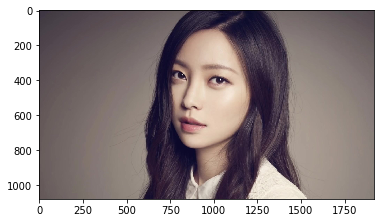

In [49]:
#讀入資料
data = open('girl.jpg','rb').read()
# 'Content-Type': 'application/octet-stream' 代表要使用本地端的圖片資料
headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
response = requests.post(face_api_url, params=params, headers=headers, data=data)

print(json.dumps(response.json()))
# 畫出圖片
img = Image.open('girl.jpg')
imshow(img)